In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
x_train=np.loadtxt('input.csv',delimiter=',')
y_train=np.loadtxt('labels.csv',delimiter=',')

x_test=np.loadtxt('input_test.csv',delimiter=',')
y_test=np.loadtxt('labels_test.csv',delimiter=',')

FileNotFoundError: input.csv not found.

In [3]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)
x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)
x_train = x_train/255.0
x_test = x_test/255.0

NameError: name 'x_train' is not defined

In [11]:
print("Shape of X_train: ", x_train.shape)
print("Shape of Y_train: ", y_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of Y_test: ", y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


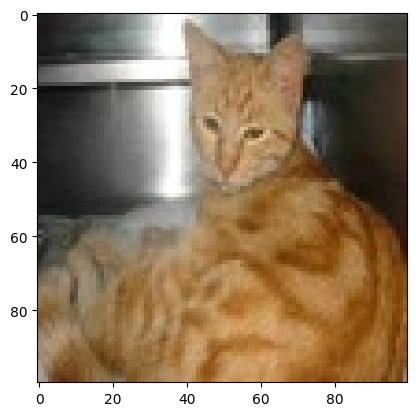

In [14]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

In [15]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

/home/student/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-07 11:30:09.280613: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [ ]:
model.fit(x_train, y_train, epochs = 10, batch_size = 64)

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
test_loss , test_acuracy = model.evaluate(x_test , y_test)
print("Loss: %.3f" %test_loss) 
print("Accuracy: %.3f" %test_acuracy) 

In [ ]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Animal in the image is :", pred)